### Ingest Data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
!wget https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip 

--2022-02-09 17:05:03--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/zip/refs/heads/main [following]
--2022-02-09 17:05:03--  https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]  15.25M  30.3MB/s    in 0.5s    

2022-02-09 17:05:04 (30.3 MB/s) - ‘main.zip’ saved [15993933]



In [3]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
1a48d685d3ea3815b6949740d9539f8fb4993407
   creating: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/
  inflating: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/MNIST_Digit_Recognizer_Kaggle_Competition.ipynb  
  inflating: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/README.md  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/test.csv.zip  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/train.csv.zip  


In [4]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/test.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/test.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs/test.csv  


In [5]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/train.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/train.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs/train.csv  


In [6]:
df_train = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs/train.csv')

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-Kaggle-Competition-main/csvs/test.csv')

In [9]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### EDA

Combinging test and train data for EDA process, will separate again prior to model training. 

In [11]:
dataframes = [df_train, df_test]
df_comb = pd.concat(dataframes)

In [13]:
df_comb.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 27999
Columns: 785 entries, label to pixel783
dtypes: float64(1), int64(784)
memory usage: 419.8 MB


In [15]:
df_comb.isnull().sum()

label       28000
pixel0          0
pixel1          0
pixel2          0
pixel3          0
            ...  
pixel779        0
pixel780        0
pixel781        0
pixel782        0
pixel783        0
Length: 785, dtype: int64

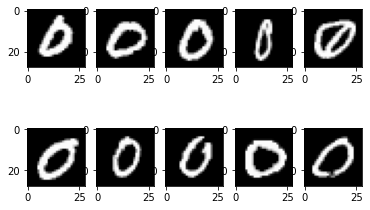

In [51]:
X = df_comb.iloc[:,1:].values / 255 
y = df_comb.iloc[:,0].values

fig,ax = plt.subplots(2,5)
for i in range(10):
    nparray = X[i].reshape(28,28)
    image = Image.fromarray(nparray * 255)
    ax[i%2][i//2].imshow(image)
fig.show()

In [27]:
df_comb.sort_values(by='label', inplace = True)

In [28]:
df_train1, df_test1 = df_comb.head(785), df_comb.tail(784)

In [29]:
df_test1 = df_test1.drop(['label'], axis=1)

In [30]:
#hmmmmm this didn't work haha
print(df_train.shape)
print(df_train1.shape)

(42000, 785)
(785, 785)


In [31]:
print(df_test.shape)
print(df_test1.shape)

(28000, 784)
(784, 784)


Splitting the training data into X and y variables.

In [56]:
y = df_train['label'].values
X = df_train.drop(columns = ['label']).values

In [37]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


label is 9


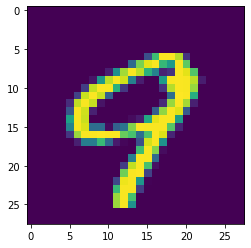

In [39]:
X_square = X.reshape(-1, 28, 28)
index = 100
plt.imshow(X_square[100])
print(f"label is {y[100]}")

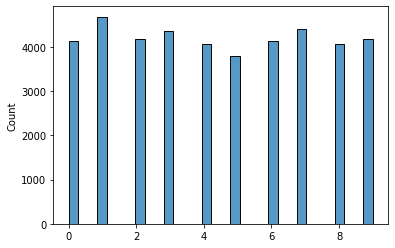

In [57]:
sns.histplot(y)

In [58]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]))

This is showing that we have 10 unique values ranging from 0-9. Showing a fairly even distribution.

In [60]:
# How do we find that a feature has an integer number range of (0:255)
# this seems like something everyone on the internet just knows for this dataset....
X_square = X_square / 255.
X = X / 255.

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

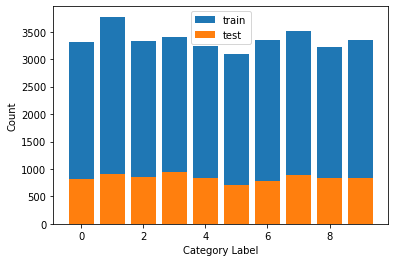

In [77]:
labels, count = np.unique(y_train, return_counts=True)
plt.bar(labels, count, label = "train")
labels, count = np.unique(y_test, return_counts = True)
plt.bar(labels, count, label = "test")
plt.xlabel("Category Label")
plt.ylabel("Count")
plt.legend()

Still have a good distribution of numbers in our training and testing set. 

#### PCA

In [80]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x_reduced = pca.fit_transform(x_train)

(33600, 153)

components_: holds the unit vector that defines the first principal component

explained_variance_ratio_: states the proportion of the variance that lies along each principal component

Setting n_components = 0.95 (or other number if desired) to indicating the ratio of variance you would like to keep

In [81]:
x_reduced.shape

(33600, 153)

PCA took us from 785 columns down to 153 columns. 

In [17]:
# plot variance
# plot cumsum(pca.explained_variance_ratio_)
# use similar code from my last notebook

There will be a little quality loss of the images but the numbers should still be good enough for the model to decipher after compression the training set.

This is like a shadow of a person walking around aka 3D - compressing the signal into a shadow. You are removing noise so you have a higher signal. You can use it to improve clustering. Do this because of the curse of dimenstionality. The more dimentionality you have, the less understanding you have. Makes clustering possible with high dimensional data. Also good for removing noise, get a more clear picture. Issue with Big data, you might not be able to do clustering because of computational amount of processing. 

### Models

#### Random Forest

##### All Features Included

Time it took: 

##### Features from PCA

Time it took: 

#### K-Means Clustering

### Conculsion